In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%qtconsole

In [137]:
def sigmoid(v):
    return np.tanh(v)
    #return 1/(1+np.exp(-v))
    #return v

In [138]:
def sigmoid_derivative(v):
    return 1 - sigmoid(v)**2
    #return sigmoid(v)*(1-sigmoid(v))
    #return np.ones(v.shape)

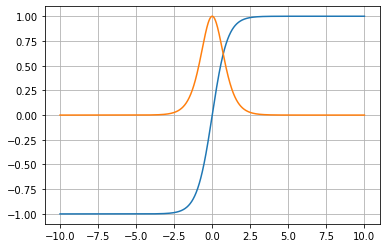

In [139]:
x1 = np.linspace(-10,10,1000)
y1 = [sigmoid(e) for e in x1]
dy1 = [sigmoid_derivative(e) for e in x1]
plt.plot(x1,y1)
plt.plot(x1,dy1)
plt.grid(True)
plt.show()

In [140]:
def mlpclass(y):
    y = y[0]
    res = [np.sign(e) for e in y]
    return res

In [98]:
def label2target(c,nb_classe):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((nb_classe,n))
    for i in range(n):
        res[c[i],i] = 1
    return res

In [99]:
def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

In [100]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

In [162]:
class NeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, n_out):
        #Matrice d'entrée augmentée
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        #Matrice de poids aléatoires entre 0 et w_sup
        self.weights     = (np.random.rand(self.input_train.shape[0],n_out)-np.random.randint(0,2,(self.input_train.shape[0],n_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        #Calcul une propagation dans le réseau avec les données d'entrainement si train = True
        #et avec les données de test si train = False
        if train == True:
            self.layer = np.dot(self.input_train.T, self.weights)
            self.output = sigmoid(self.layer)
        else:
            self.layer = np.dot(self.input_test.T, self.weights)
            self.output = sigmoid(self.layer)

    def backprop(self, lr):
        #Calcul de l'erreur
        self.error =  self.output - self.y_train
        #Calcul de la matrice d'évolution des poids
        d_weights = lr*np.dot(self.input_train, (2*self.error * sigmoid_derivative(self.layer)))
        #Calcul des nouveaux poids
        self.weights -= d_weights
        
    def train(self, it, lr):
        #Entraine le réseau de neurones et complète une liste errrors des erreurs quadratiques
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        #Teste la performance du réseau sur la base d'entrainement si train = True, base de test sinon
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

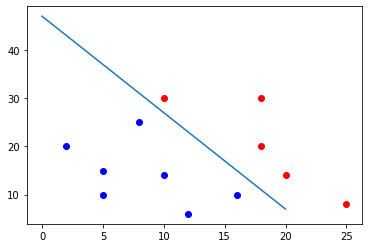

In [198]:
X = np.array([[18,20,10,25,18,16,5,12,2,5,10,8],[30,14,30,8,20,10,15,6,20,10,14,25]])
Y = np.array([0,0,0,0,0,1,1,1,1,1,1,1]).T
Y = np.reshape(Y,(12,1))

XX = np.array([[5,10,17.5,10,10],[10,14,14,25,30]])
YY = np.array([1,1,0,1,0]).T
YY = np.reshape(YY,(5,1))

x = np.linspace(0,20,100)
y = [47 - 2*e for e in x]
plt.plot(X[0][0:5],X[1][0:5],'o',color='red')
plt.plot(X[0][5:12],X[1][5:12],'o',color='blue')
plt.plot(x,y)
plt.show()

In [1]:
nn = NeuralNetwork(X,Y,XX,YY, w_sup = 1e-1, n_out = 1)
it, lr = 2000, 1e-3
nn.train(it,lr)

NameError: name 'NeuralNetwork' is not defined

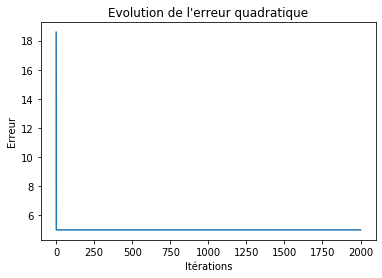

{'nb': 7, 'taux': 0.58} [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [203]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
print(nn.test(train = True),nn.pred)

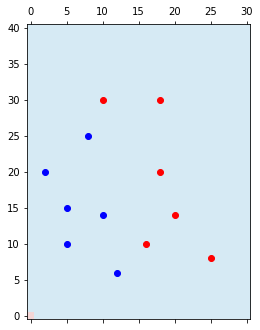

In [199]:
X = np.array([[18,20,10,25,18,16,5,12,2,5,10,8],[30,14,30,8,20,10,15,6,20,10,14,25]])
x = np.linspace(0,30,31)
y = [47 - 2*e for e in x]
b = (0.5-nn.weights[0][0])/nn.weights[2][0] 
c = -(nn.weights[1][0]/nn.weights[2][0])
yy = [b+c*e for e in x]

def pred(X):
    X = np.concatenate(([1],X),axis=0)
    return np.sign(sigmoid(np.dot(nn.weights.T,X)))

z = np.linspace(0,40,41)
    
M = np.zeros((len(x),len(z)))
for i in range(len(x)):
    for j in range(len(z)):
        M[i,j] = pred([x[i],z[j]])
from matplotlib.colors import ListedColormap

cmap = ListedColormap([[0.8,0.2,0.2,0.2], [0.2,0.6,0.8,0.2]])
plt.matshow(M.T,cmap = cmap, origin = 'lower')

plt.plot(X[0][0:6],X[1][0:6],'o',color='red')
plt.plot(X[0][6:12],X[1][6:12],'o',color='blue')
#plt.plot(x,y)
#plt.plot(x,yy)
plt.show()

In [15]:
nn.test(train=False)

{'nb': 0, 'taux': 0.0}